# Non-Linear Regression

In [1]:
# importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# reading data
df = pd.read_csv("../datasets/Regression/china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [4]:
xdata = df.Year
ydata = df.Value

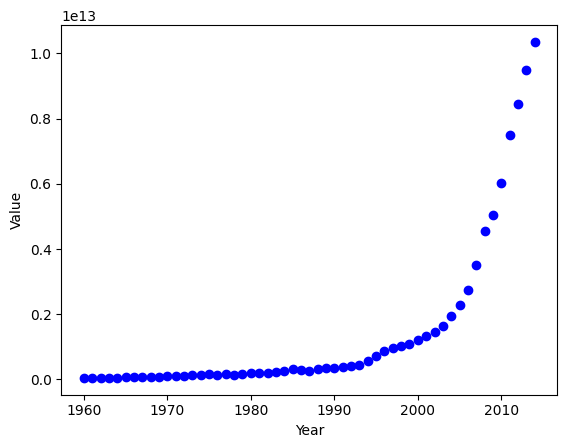

In [5]:
plt.scatter(xdata, ydata, color='blue')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

## Choosing model 
From an initial look at the plot, we determine that the logistic function could be a good approximation, since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

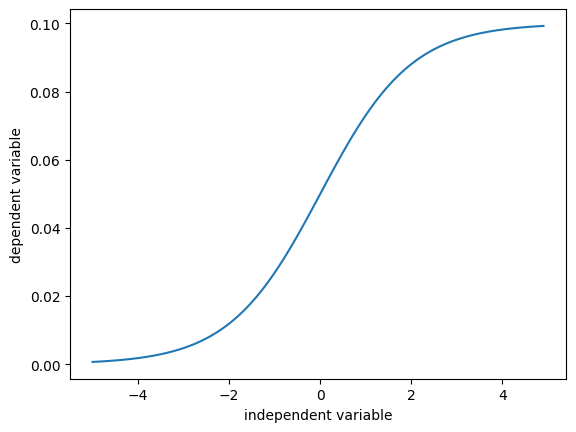

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = 0.1/(1.0 + np.exp(-x))

plt.plot(x,y)
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.show()


The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{-\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

### Building The Model ###
Now, let's build our regression model and initialize its parameters. 

In [15]:
def sigmoid(x, beta_1, beta_2):
    y = 1.0/(1.0 + np.exp(-beta_1*(x - beta_2)))
    return y

Lets look at a sample sigmoid line that might fit with the data

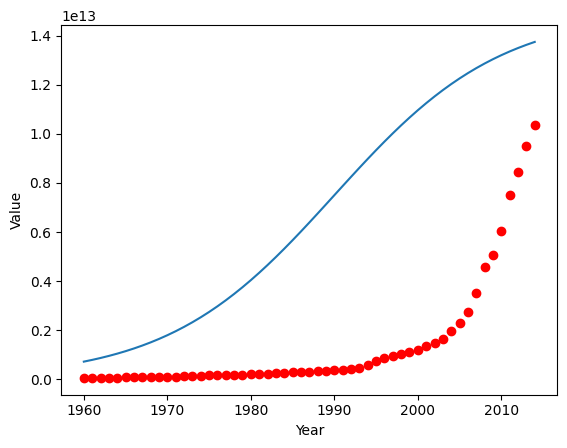

In [19]:
beta_1 = 0.10
beta_2 = 1990.0

y_pred = sigmoid(xdata, beta_1, beta_2)

plt.plot(xdata, ydata, 'ro')
plt.plot(xdata, y_pred*15000000000000.0)
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

Our task here is to find the best parameters for our model. Lets first normalize our x and y:

In [21]:
# Lets normalize our data
xdata =xdata/max(xdata)
ydata =ydata/max(ydata)

#### How we find the best parameters for our fit line?
we can use __curve_fit__ which uses non-linear least squares to fit our sigmoid function, to data. Optimize values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters.

In [24]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#printing the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


### Now we plot our resulting regression model.

In [28]:
x = np.linspace(1960, 2015, 15)
x

array([1960.        , 1963.92857143, 1967.85714286, 1971.78571429,
       1975.71428571, 1979.64285714, 1983.57142857, 1987.5       ,
       1991.42857143, 1995.35714286, 1999.28571429, 2003.21428571,
       2007.14285714, 2011.07142857, 2015.        ])

In [31]:
x = x/max(x)
y = sigmoid(x, *popt)

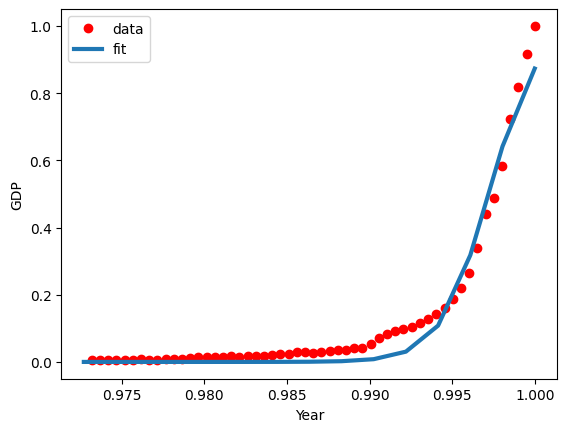

In [32]:
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [33]:
# testing the model
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# building model using train test
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predicting using test set
y_predict = sigmoid(test_x, *popt)

# evaluating
print("MAE: %.2f" % np.mean(np.absolute(y_predict - test_y)))
print("MSE: %.2f" % np.mean((y_predict - test_y)**2))

from sklearn.metrics import r2_score

print("R2-score: %.2f" % r2_score(test_y, y_predict))

MAE: 0.03
MSE: 0.00
R2-score: 0.98
